## Problem 1: 
### Anita Mezzetti

See PDF file for details

index:
1. [Complete undirected graph from nodes](#complete)
2. [Conditional independence tests and delete edges](#direct)
    - [Partial correlation function](#partial)
    - [Threshold](#threshold)

In [1]:
import numpy as np
from scipy.io import loadmat
import networkx as nx
from scipy.stats import norm
import matplotlib.pyplot as plt
from numpy.linalg import det, inv
import math

import numpy as N, networkx as nx
import pandas as pd
import sys 
from networkx import DiGraph
from itertools import combinations, permutations
from networkx.algorithms.cycles import find_cycle, simple_cycles
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Define $\alpha$:

In [2]:
alpha = 0.1

Load data and chech size:

In [3]:
data = loadmat("Data.mat")['D']
n = data.shape[0] # sample size
data.shape

(10000, 8)

Covariance matrix $\Sigma$ :

In [4]:
cov = np.cov(data.T)
nodes = np.array(range(8))
cov.shape

(8, 8)

In [5]:
#check if the covariance matrix is symmetric
(cov.transpose() == cov).all()

True

### 1. Complete undirected graph from nodes <a name="complete"></a>

I created a function. Then, I discovered that there was a function in Networkx which does the same (_nx.complete_graph(n)_)

In [6]:
# this function create a complete graph (with all possible edges)
def complete_graph(nodes):
    G = nx.Graph()

    G.add_nodes_from(nodes)
    for (i, j) in combinations(nodes, 2):
        G.add_edge(i, j)

    return G

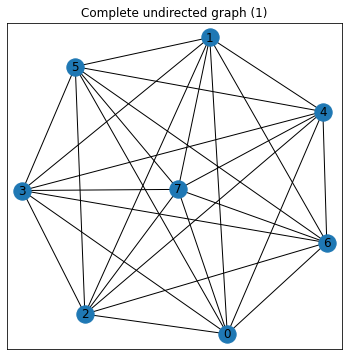

In [7]:
G = complete_graph(nodes) # or nx.complete_graph(nodes)

fig, ax = plt.subplots(figsize=(6, 6))
nx.draw_networkx(G)
plt.title("Complete undirected graph (1)")
plt.show()

## (2) Perform conditional independence tests at a given significance level and delete edges based on the tests <a name="direct"></a>

See all the datails in the PDF

This function finds $\Sigma_{X|Y}$ for a multivariate sample and calculate the partial correlation (see PDF): <a name="partial"></a> 

In [8]:
import pingouin as pg

def cond_part_corr_normal (data,a,z):
    
    values = [data[: , a[0]]] # shape 10000x1
    values = np.concatenate((values, [data[: , a[1]]])) 
    values = np.concatenate((values, [data[: , z[0]]])) 
    
    # we have to use these names to make it work
    name = ["x","y",str(z[0])]
    
    if len(z)>1:
        for i in z[1:]:
            values = np.concatenate((values, [data[: , i]])) 
            name =  np.concatenate((name, [str(i)] ))

    df = pd.DataFrame(values.T, columns=name)
 
    result = df.pcorr()

    return abs(result.y.x)

In [9]:
"""x=[0,1]
z=[2, 3, 4, 5, 6, 7]
print(cond_part_corr_normal (data,x,z))"""
#the order does not change anything

'x=[0,1]\nz=[2, 3, 4, 5, 6, 7]\nprint(cond_part_corr_normal (data,x,z))'

This function finds the threshold:  <a name="threshold"></a> 

In [10]:
def threshold (alpha,n,s):
    if isinstance(s,int):
        abs_s = 1
    else: 
        abs_s = len(s)
    num = norm.ppf(1-alpha/2)
    den = math.sqrt(n-abs_s-3)
    return num/den

In the nex cell we remove edges from the completed undirected graph:

In [11]:
for i in list(nodes):
    for j in list(nodes):
        if j>i: # no the node itself and no repeat

            # s contains nodes which are not i or j
            nodes = G.nodes()
            s = [x for x in nodes if x!=i]
            s = [x for x in s if x!=j]
            

            x = [i,j]
            
            partial_corr = cond_part_corr_normal (data,x,s)
            t = threshold(alpha,n,s)
            
            #print(s)
            print("%d -> %d : part_corr = %.4f threshold = %.4f" %(i, j, partial_corr, t))

            if partial_corr<t: 
                # zero partial correlation
                G.remove_edge(i,j)

0 -> 1 : part_corr = 0.0009 threshold = 0.0165
0 -> 2 : part_corr = 0.4168 threshold = 0.0165
0 -> 3 : part_corr = 0.1688 threshold = 0.0165
0 -> 4 : part_corr = 0.2892 threshold = 0.0165
0 -> 5 : part_corr = 0.0156 threshold = 0.0165
0 -> 6 : part_corr = 0.0008 threshold = 0.0165
0 -> 7 : part_corr = 0.0070 threshold = 0.0165
1 -> 2 : part_corr = 0.0064 threshold = 0.0165
1 -> 3 : part_corr = 0.0027 threshold = 0.0165
1 -> 4 : part_corr = 0.2943 threshold = 0.0165
1 -> 5 : part_corr = 0.0010 threshold = 0.0165
1 -> 6 : part_corr = 0.6300 threshold = 0.0165
1 -> 7 : part_corr = 0.0080 threshold = 0.0165
2 -> 3 : part_corr = 0.2314 threshold = 0.0165
2 -> 4 : part_corr = 0.1896 threshold = 0.0165
2 -> 5 : part_corr = 0.0008 threshold = 0.0165
2 -> 6 : part_corr = 0.0040 threshold = 0.0165
2 -> 7 : part_corr = 0.5580 threshold = 0.0165
3 -> 4 : part_corr = 0.1243 threshold = 0.0165
3 -> 5 : part_corr = 0.0004 threshold = 0.0165
3 -> 6 : part_corr = 0.0165 threshold = 0.0165
3 -> 7 : part

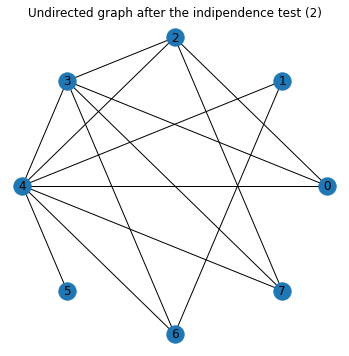

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
if nx.check_planarity(G, counterexample=False)[0]: # if planar
    pos = nx.circular_layout(G)
    nx.draw(G, pos=pos, with_labels=True)
else: # if not planar
    pos = nx.draw_networkx(G)
plt.title("Undirected graph after the indipendence test (2)")
plt.show()

In [13]:
# togliiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
#G.add_edge(3,7)
#G.add_edge(0,7)
#G.add_edge(5,1)

In [14]:
"""# delete isolates nodes
G.remove_nodes_from(list(nx.isolates(G)))

fig, ax = plt.subplots(figsize=(6, 6))
nx.draw_networkx(G)
plt.title("Undirected graph after the indipendence test (2)")
plt.show()"""

'# delete isolates nodes\nG.remove_nodes_from(list(nx.isolates(G)))\n\nfig, ax = plt.subplots(figsize=(6, 6))\nnx.draw_networkx(G)\nplt.title("Undirected graph after the indipendence test (2)")\nplt.show()'

In [15]:
di_G = nx.DiGraph() # directed graph
di_G.add_nodes_from(G.nodes()) # add all nodes


# statistical orientation: unshielded colliders
triples = list(combinations(nodes,3)) # all possible triplets

v_struct = [] # save all v structures

for triple in triples:
    permuta = list(permutations(triple))
    for t in permuta:
        if G.has_edge(t[0],t[1]) and G.has_edge(t[2],t[1]) and not G.has_edge(t[0],t[2]): 
            v_struct.append(t)

# app v structures are in double copy, so I keep only one
#v_struct = np.array([v_struct[v] for v in range(len(v_struct)) if v%2==0])
v_struct

[(0, 4, 1),
 (1, 4, 0),
 (0, 2, 7),
 (7, 2, 0),
 (0, 3, 6),
 (6, 3, 0),
 (0, 3, 7),
 (7, 3, 0),
 (0, 4, 5),
 (5, 4, 0),
 (0, 4, 6),
 (6, 4, 0),
 (0, 4, 7),
 (7, 4, 0),
 (1, 4, 2),
 (2, 4, 1),
 (1, 4, 3),
 (3, 4, 1),
 (1, 6, 3),
 (3, 6, 1),
 (1, 4, 5),
 (5, 4, 1),
 (1, 4, 7),
 (7, 4, 1),
 (2, 3, 6),
 (6, 3, 2),
 (2, 4, 5),
 (5, 4, 2),
 (2, 4, 6),
 (6, 4, 2),
 (3, 4, 5),
 (5, 4, 3),
 (6, 3, 7),
 (7, 3, 6),
 (5, 4, 6),
 (6, 4, 5),
 (5, 4, 7),
 (7, 4, 5),
 (6, 4, 7),
 (7, 4, 6)]

In [16]:
"""di_G.add_edges_from(G.edges())
di_G = di_G.to_undirected()"""

'di_G.add_edges_from(G.edges())\ndi_G = di_G.to_undirected()'

In [17]:
# find unshielded colliders

for v in v_struct:
    # v = (x,y,z)
    # we already know that x and z are ind 
    # we want to check if 


    x = [v[0],v[2]]
    y = int(v[1])

    sigma_x = cov[x][:,x]
    sigma_y = cov[y][y]
    sigma_xy = cov[x,y].reshape(2,1)
    sigma_yx = cov[y,x]

    cond_cov = sigma_x - sigma_xy * (np.reciprocal(sigma_y)) * sigma_yx

    aij = cond_cov[0,1]
    aii = cond_cov[0,0]
    ajj = cond_cov[1,1]

    partial_corr = abs(aij / (math.sqrt(aii*ajj)))
   
    t = threshold(alpha,n,y)

    if partial_corr>t: 
        di_G.add_edge(x[0],y)
        di_G.add_edge(x[1],y)

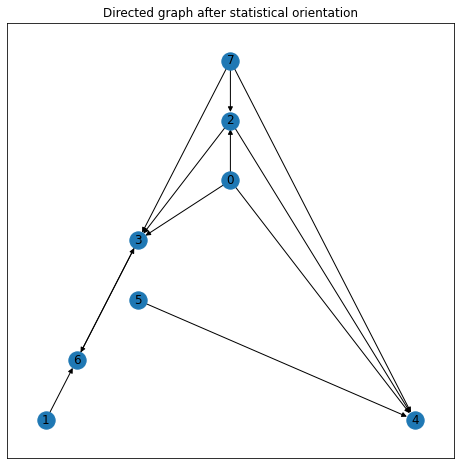

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
#nx.draw_planar(di_G, with_labels=True)
nx.draw_networkx(di_G, pos = pos)
plt.title("Directed graph after statistical orientation")
plt.show()

In [19]:
def find_colliders(G, di_G):
    # undirected G
    # directed di_G 

    coll = []

    for edge1 in di_G.edges():
        for edge2 in di_G.edges():
            if edge1 != edge2: # not the same edge
                if edge1[1] == edge2[1]: #they arriveto the same node
                    if (edge1[0], edge2[0]) not in G.edges(): # if the two nodes are not linked
                        # collider!
                        coll.append(edge1[1])    

    coll = list(dict.fromkeys(coll)) # no duplicates
    return coll

In [20]:
# logical orientation: avoid spurious unshielded (no other colliders)

#we check that colliders before and after this passage are the same
colliders_before = find_colliders(G, di_G)

flag = 0 

while flag == 0:

    flag = 1 # it will become 1 if we'll add other edges

    # find all nodes where some edges arrive
    dir_edges = np.array( di_G.edges() )
    arr_nodes = list(dict.fromkeys(dir_edges[:,1])) # list nodes where arrive edges

    print("---------------------------------\nArriving nodes in the graph:")
    print(arr_nodes)

    for c in arr_nodes:
                
        # if this neighbour is not directly linked to one of the neighbours n 
        # for which you already have an incoming arrow
        incoming_edges = np.array(list( di_G.in_edges(c) ))
        nodes_incoming_edges = incoming_edges[:,0]

        print(f"---------------------------------\nNodes incoming edges in {c}")
        print(nodes_incoming_edges)

        for neigh in list(G.neighbors(c)): # for all neighbours of c in the undirected graph

            print(f"\nFor {neigh} (neighbour of {c}):")
            
            neighbours = list(G.neighbors(neigh))
            neighbours = [x for x in neighbours if x!=c] # without condiering the collider

            print(f"Neighbours of {neigh}: {neighbours}")

            #neighbours which have incoming arrows
            neighbours_incoming = [x for x in neighbours if x in nodes_incoming_edges] 

            print(f"neigh incoming {neighbours_incoming}")

            # if neighbours_incoming is empty, okay
            # if neighbours_incoming is not empty: the neighbour is directed connect to ALL
            # the incoming edges (same lenght), so we should not conider it
            if len(neighbours_incoming)!=len(incoming_edges):
            
                # if we haven't that edge in the directed graph yet
                if not (di_G.has_edge(neigh,c) or di_G.has_edge(c, neigh)):
                    # create edge not to have create other collisions
                    print(f"Add edge ({neigh},{c})")
                    di_G.add_edge(c,neigh)
                    flag = 0 # another loop

---------------------------------
Arriving nodes in the graph:
[2, 3, 4, 6]
---------------------------------
Nodes incoming edges in 2
[0 7]

For 0 (neighbour of 2):
Neighbours of 0: [3, 4]
neigh incoming []

For 3 (neighbour of 2):
Neighbours of 3: [0, 4, 6, 7]
neigh incoming [0, 7]

For 4 (neighbour of 2):
Neighbours of 4: [0, 1, 3, 5, 6, 7]
neigh incoming [0, 7]

For 7 (neighbour of 2):
Neighbours of 7: [3, 4]
neigh incoming []
---------------------------------
Nodes incoming edges in 3
[0 6 7 2]

For 0 (neighbour of 3):
Neighbours of 0: [2, 4]
neigh incoming [2]

For 2 (neighbour of 3):
Neighbours of 2: [0, 4, 7]
neigh incoming [0, 7]

For 4 (neighbour of 3):
Neighbours of 4: [0, 1, 2, 5, 6, 7]
neigh incoming [0, 2, 6, 7]

For 6 (neighbour of 3):
Neighbours of 6: [1, 4]
neigh incoming []

For 7 (neighbour of 3):
Neighbours of 7: [2, 4]
neigh incoming [2]
---------------------------------
Nodes incoming edges in 4
[0 5 7 2]

For 0 (neighbour of 4):
Neighbours of 0: [2, 3]
neigh inc

In [21]:
# check if it is fine (if we actually avoid new colliders)
colliders_after = find_colliders(G, di_G)
if colliders_after==colliders_before:
    print("We did not create new colliders (GOOD)")
else:
    print("We created new colliders (BAD)")

We did not create new colliders (GOOD)


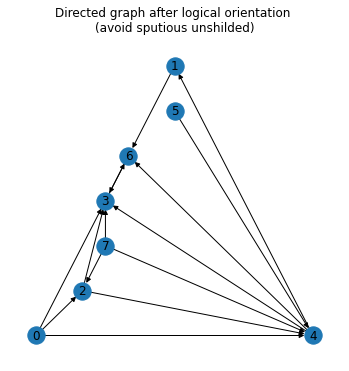

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
#nx.draw_networkx(di_G)

nx.draw_planar(di_G, with_labels=True)

plt.title("Directed graph after logical orientation \n(avoid sputious unshilded)")
plt.show()

In [23]:
try:
    find_cycle(di_G)
except:
    print("No cycles (GOOD)")

In [24]:
# avoid cycles

# find all undirected cycles:
#remember that a cycle can also have more the 3 nodes!
list(simple_cycles(di_G))

[[3, 6]]

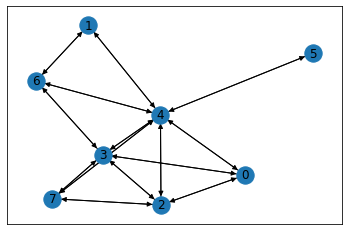

In [25]:
F = nx.DiGraph()
F.add_edges_from(G.edges())

#also inverted edges
for i in G.edges(): 
    F.add_edge(i[1],i[0])

nx.draw_networkx(F)

In [26]:
# we have trasformed the undirected graph to a completed dir graph because the function simple cicles works only with dir graphs.

# all cycles 
cycles = list(simple_cycles(F))

# don't consider cycles with only two nodesù
cycles = [c for c in cycles if len(c)>2]

import itertools 
# drop duclicates
cycles = [sorted(c) for c in cycles]
cycles.sort()
cycles = list(cycles for cycles,_ in itertools.groupby(cycles))
cycles

[[0, 1, 2, 3, 4, 6],
 [0, 1, 2, 3, 4, 6, 7],
 [0, 1, 3, 4, 6],
 [0, 2, 3],
 [0, 2, 3, 4],
 [0, 2, 3, 4, 6],
 [0, 2, 3, 4, 6, 7],
 [0, 2, 3, 4, 7],
 [0, 2, 3, 7],
 [0, 2, 4],
 [0, 2, 4, 7],
 [0, 3, 4],
 [0, 3, 4, 6],
 [0, 3, 4, 7],
 [1, 2, 3, 4, 6],
 [1, 2, 3, 4, 6, 7],
 [1, 3, 4, 6],
 [1, 3, 4, 6, 7],
 [1, 4, 6],
 [2, 3, 4],
 [2, 3, 4, 6],
 [2, 3, 4, 6, 7],
 [2, 3, 4, 7],
 [2, 3, 7],
 [2, 4, 7],
 [3, 4, 6],
 [3, 4, 6, 7],
 [3, 4, 7]]

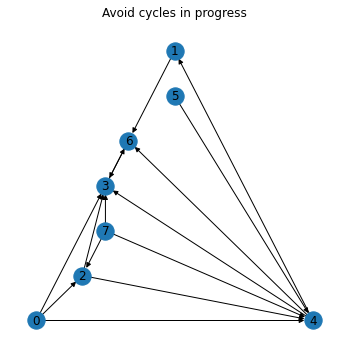

Cycle [0, 1, 2, 3, 4, 6]:
Edges already present: [(0, 2), (0, 3), (0, 4), (2, 3), (2, 4), (3, 6), (4, 1), (4, 3), (4, 6), (1, 6), (6, 3)]

-----------------------
Cycle [0, 1, 2, 3, 4, 6, 7]:
Edges already present: [(0, 2), (0, 3), (0, 4), (2, 3), (2, 4), (3, 6), (4, 1), (4, 3), (4, 6), (1, 6), (6, 3), (7, 2), (7, 3), (7, 4)]

-----------------------
Cycle [0, 1, 3, 4, 6]:
Edges already present: [(0, 3), (0, 4), (3, 6), (4, 1), (4, 3), (4, 6), (1, 6), (6, 3)]

-----------------------
Cycle [0, 2, 3]:
Edges already present: [(0, 2), (0, 3), (2, 3)]

-----------------------
Cycle [0, 2, 3, 4]:
Edges already present: [(0, 2), (0, 3), (0, 4), (2, 3), (2, 4), (4, 3)]

-----------------------
Cycle [0, 2, 3, 4, 6]:
Edges already present: [(0, 2), (0, 3), (0, 4), (2, 3), (2, 4), (3, 6), (4, 3), (4, 6), (6, 3)]

-----------------------
Cycle [0, 2, 3, 4, 6, 7]:
Edges already present: [(0, 2), (0, 3), (0, 4), (2, 3), (2, 4), (3, 6), (4, 3), (4, 6), (7, 2), (7, 3), (7, 4), (6, 3)]

-------------

In [27]:
flag = 0 

while flag == 0:

    
    #plot
    fig, ax = plt.subplots(figsize=(6, 6))
    nx.draw_planar(di_G, with_labels=True)
    plt.title("Avoid cycles in progress")
    plt.show()

    flag = 1 # it will become 1 if we'll add other edges

    # we use the all possible cycles of the graph, so we can use always cycles
    for cycle in cycles:

        print(f"Cycle {cycle}:")

        cycle_graph = nx.DiGraph()

        #check if some edges are already present
        for (i, j) in combinations(cycle, 2):
            if di_G.has_edge(i,j) :
                cycle_graph.add_edge(i,j)
            if di_G.has_edge(j,i) :
                cycle_graph.add_edge(j,i)

        cycle_nodes = list(cycle_graph.nodes)
        
        print(f"Edges already present: {cycle_graph.edges}")

        # if we miss more than one edge for each cycle, we surely 
        # don't risk to create a cycle in this step
        # we consider only when we miss one edge

        if len(cycle_graph.edges)==len(cycle_nodes)-1: # sitema!!!

            # we chack if there is a collider, because if there is, 
            # we surely don't risk to create a cycleù

            un_cycle_graph = complete_graph(cycle_nodes) # undirected complete graph

                
            #nx.draw_networkx(un_cycle_graph)
            #plt.figure()
            #nx.draw_networkx(cycle_graph)
        
            
            coll = find_colliders(un_cycle_graph, cycle_graph)

            # if there are colliders we do not risk to create a cycle, so we don't add anything
            # otherwise:
            if not coll:
                # we try to add a directional edge and we check if we would get a cycle. if we would 
                # we had the edge in the inverse direction

                #for each node we save the number of neigh eand we create an edge between the two                   nodes with less edges
                print(f"nodes:     {cycle_nodes}")

                neigh = [0] * len(cycle_nodes)

                for n in range(len(cycle_graph.nodes)):
                    node = list(cycle_graph.nodes)[n]
                    neigh[n] = len(list(cycle_graph.in_edges(node))) + len(list(cycle_graph.out_edges(node)))

                print(f"num neigh: {neigh}")

                #create an edge between the two mins:
                minn = min(neigh) # find the min
                pos = [i for i, e in enumerate(neigh) if e == minn] # find the positions of the min

                nodes = [cycle_nodes[pos[0]], cycle_nodes[pos[1]]]

                cycle_graph.add_edge(nodes[0], nodes[1])



                # now I hva eto check if I have a cycle
                if len(list(simple_cycles(cycle_graph)))==0: # no cycles

                    # we add it only if we would have het a cycle in the other dir
                    cycle_graph.remove_edge(nodes[0], nodes[1]) # remove the edge
                    cycle_graph.add_edge(nodes[1], nodes[0]) # add the edge in the other direction

                    if len(list(simple_cycles(cycle_graph)))>0: 
                        # the other direction would have given a cycle
                        di_G.add_edge(nodes[0], nodes[1])
                        print(f"Add edge{[nodes[0], nodes[1]]}")
                        flag = 0
                
                else: # we have a cycle: try with an edge in the other direction
                    cycle_graph.remove_edge(nodes[0], nodes[1]) # remove the edge
                    cycle_graph.add_edge(nodes[1], nodes[0]) # add the edge in the other direction

                    if len(list(simple_cycles(cycle_graph)))==0: # no cycles
                        di_G.add_edge(nodes[1], nodes[0])
                        print(f"Add edge{[nodes[0], nodes[1]]}")
                        flag = 0
                    
        print("\n-----------------------")



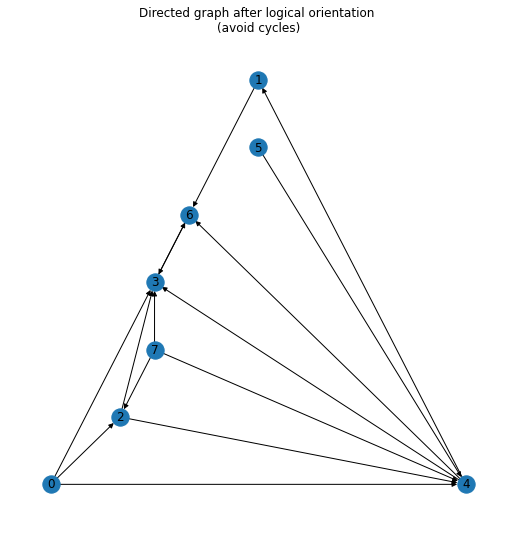

In [28]:
fig, ax = plt.subplots(figsize=(9, 9))
nx.draw_planar(di_G, with_labels=True)
plt.title("Directed graph after logical orientation \n(avoid cycles)")
plt.show()

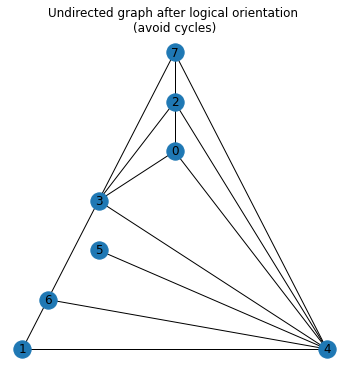

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
nx.draw_planar(G, with_labels=True)
plt.title("Undirected graph after logical orientation \n(avoid cycles)")
plt.show()